In [1]:
# IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns                                   # For pretty plot

%matplotlib inline
%load_ext autoreload
%autoreload 2

pd.options.display.max_columns = 50                     # For displaying all the columns of our dataset

# Exercise 1
_Generate a word cloud based on the raw corpus._

In [2]:
emails = pd.read_csv('hillary-clinton-emails/Emails.csv')

In [3]:
emails.head()

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,MetadataDocumentClass,ExtractedSubject,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,HRC_Email_296,FW: Wow,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,HRC_Email_296,NaN,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,HRC_Email_296,Re: Chris Stevens,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,HRC_Email_296,FVV: Cairo Condemnation - Final,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,HRC_Email_296,NaN,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


The relevant information for a word cloud can be extracted from the **subject** of the email and its **extracted text**. <br>
Given that we are going to use the entire textregardless of its order, we add them as separate rows. <br>
Note that concatenating subject to body text would give less sentences: if one of the two is null, the entire sentence would be null.

In [4]:
text_series = emails.ExtractedSubject.dropna()
text_series = text_series.append(emails.ExtractedBodyText.dropna())

In [5]:
text_series.head()

0                                              FW: Wow
2                                    Re: Chris Stevens
3                      FVV: Cairo Condemnation - Final
5    Meet The Right Wing Extremist Behind Anti-Musl...
6    FW: Anti-Muslim film director in hiding, follo...
dtype: object

We then remove null (`nan`) values from these sentences.

In [6]:
text_nanfree = ' '.join(list(text_series.dropna().values))

We notice that we have `\n` characters, and so we just replace them with a space.

In [7]:
text_nanfree[-100:-50]

'linton on behalf of me and\n. supporting Afghan wom'

In [8]:
text_basic = text_nanfree.replace('\n', ' ')

In [9]:
text_basic[-100:-50]

'linton on behalf of me and . supporting Afghan wom'

## Word cloud based on the raw corpus

In [10]:
from wordcloud import WordCloud

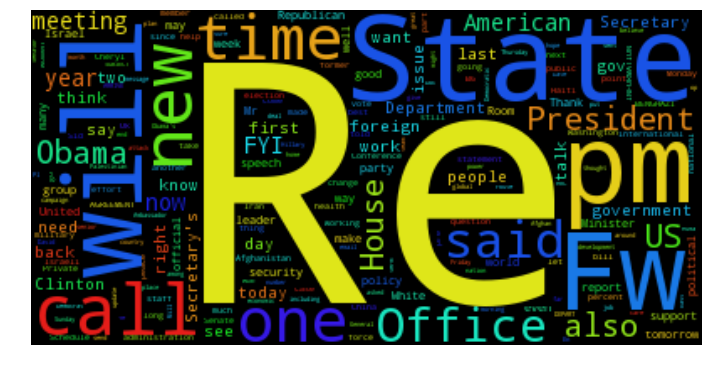

In [11]:
wordcloud = WordCloud().generate(text_basic)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

We notice that e-mail tags ("Re", "Fw", ...) are very recurrent while they do not convey any information regarding the content of the e-mails. <br>
We can also see other non-informative words such as "said", "will", "also", "call", etc. which do not give any information about the hot topics in the e-mails. <br>
"pm" usually refers to "post meridiem" and thus does not convey any additional information. However, it can also be interpreted as "prime minister", especially in this context.

## Word cloud after text pre-processing pipeline

_With the help of nltk (already available in your Anaconda environment), implement a standard text pre-processing pipeline (e.g., tokenization, stopword removal, stemming, etc.) and generate a new word cloud. Discuss briefly the pros and cons (if any) of the two word clouds you generated._

### Preprocessing the corpus
To get rid of uninformative words, we implement a standard text pre-processing pipeline consisting of:
- tokenization
- stopword removal
- stemming or lemmatization

Before proceeding in our pipeline, we convert our text to lowercase in order to aggregate the same words regardless of their position in the sentence. <br>
However, due to the political nature of the text and the many references to countries, we decide **not to lower-case capitalized words that refer to possible acronyms of countries** (e.g., US for U.S.A. and IT for Italy).

In [12]:
import pycountry

In [13]:
alpha_2 = []
alpha_3 = []
for country in pycountry.countries:
    alpha_2.append(country.alpha_2)
    alpha_3.append(country.alpha_3)

In [14]:
lowered_words = []
for word in text_basic.split():
    if word not in alpha_2+alpha_3:
        lowered_words.append(word.lower())
    else:
        lowered_words.append(word)
text_lower = ' '.join(lowered_words)

In [15]:
text_lower[:200]

'fw: wow re: chris stevens fvv: cairo condemnation - final meet the right wing extremist behind anti-muslim film that sparked deadly riots fw: anti-muslim film director in hiding, following libya, egyp'

#### Tokenization

We start by tokenizing the text: splitting it into 'words'.

In [16]:
from nltk.tokenize import wordpunct_tokenize

In [17]:
tokens = wordpunct_tokenize(text_lower)

#### Stopword removal

In [18]:
from nltk.corpus import stopwords

In [19]:
sorted(stopwords.words('english'))[:10]

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']

`nltk` stopwords do not contain punctuation, and we decide to add them as stopwords.

In [20]:
from string import punctuation

In [21]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

We also remove context-specific stopwords such as "re:", "fw:", "fyi" and so on, but, according to our previous argument, we decide to remove "pm". <br>
Moreover, some e-mails contains text like "state-scb0045293 b6 u.s. department of state case no. f-2015-04841 doc no. c05739590 date: 05/13/2015 state dept." <br>
So, we add 'date', 'doc', 'no.', 'b6' to our stopwords since we believe these would not be used as part of a message in the body of an e-mail. <br>

In [22]:
context_stopwords = ['re', 'fw', 'fwd', 'fvv', 'subject', 's', '@', 'com', 'day', 'people', 'see', 
                     'make', 'take', 'mr','today', 'tomorrow', 'think', 'new', "n't", 'call', 'work',
                     'talk', 'also', 'say', 'said', 'want', 'will', 'year', 'know', 'thank', 'thanks', 
                     'sent', 'think', 'h', 'date', 'doc', 'no.', 'b6', 'from', 'to', 'fyi', 'pm']

The final list of stopwords that we use is then given by:

In [23]:
stops = set(stopwords.words('english') + list(punctuation) + context_stopwords)

And so, we look at the word cloud without these stopwords.

In [24]:
tokens_sw = [token for token in tokens if token not in stops]

In [25]:
text_sw = ' '.join(tokens_sw)

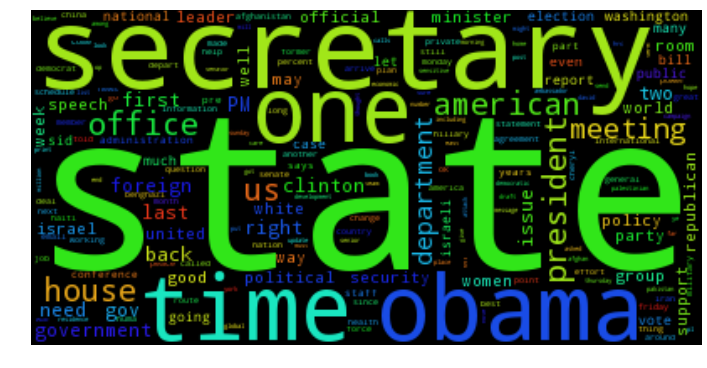

In [26]:
wordcloud_sw = WordCloud().generate(text_sw)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud_sw)
plt.axis("off")
plt.show()

We can already see that the words that appear here are much more meaningful than the ones displayed without any preprocessing. Simply removing words that do not convey any information, gives a better understanding of the topics of the e-mails.

We now compare the results obtained by applying either stemming or lemmatization to the current text.

#### Stemming
We use the common `PorterStemmer` stemmer, base on the Porter stemming algorithm.

In [27]:
from nltk.stem.porter import PorterStemmer

In [28]:
stemmer = PorterStemmer()

In [29]:
tokens_stemmed = [stemmer.stem(token) for token in tokens_sw]

In [30]:
text_st = ' '.join(tokens_stemmed)

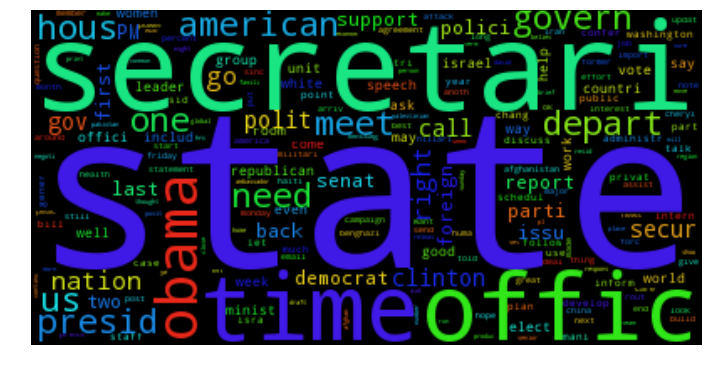

In [31]:
wordcloud_st = WordCloud().generate(text_st)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud_st)
plt.axis("off")
plt.show()

Here, the words are basically the same as the ones after stopwords removal. Even though tokens like "state" are still identified as the most frequent, we now see that other tokens, such as "secretari", have more occurrencies than others (e.g., "president"$\rightarrow$"presid").

#### Lemmatization

In [32]:
from nltk.stem import WordNetLemmatizer

In [33]:
wnl = WordNetLemmatizer()

In [34]:
tokens_lemm = [wnl.lemmatize(token) for token in tokens_sw]

In [35]:
text_lemm = ' '.join(tokens_lemm)

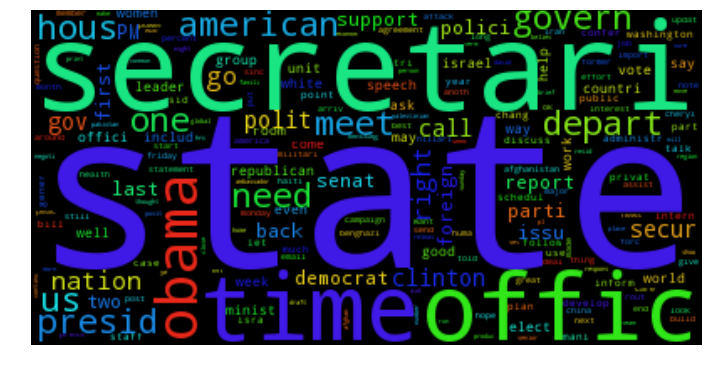

In [36]:
wordcloud_lemm = WordCloud().generate(text_lemm)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud_st)
plt.axis("off")
plt.show()

The word clouds obtained after lemmatization and stemming show the same results.<br>
We might have obtained different results if we considered other stemmers or lemmatizers.

### Cool word cloud

Finally, we now look at a "textual" portrait of Hillary Clinton :-)

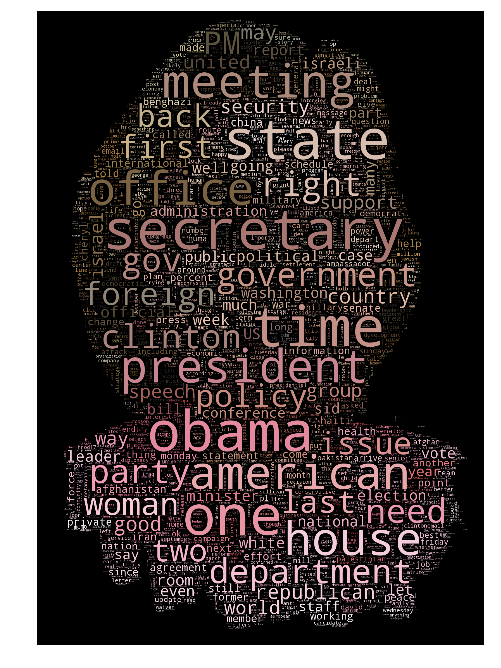

In [37]:
from PIL import Image
from wordcloud import ImageColorGenerator

# read the mask / color image
# taken from http://drawingimage.com/files/2/Hillary-Clinton-Image-Drawing.jpg
clinton_coloring = np.array(Image.open("clinton_color.jpg"))

wc_mask = WordCloud(max_words=3000, mask=clinton_coloring, 
#                     max_font_size=48, 
                    random_state=42)

# generate word cloud
wc_mask.generate(text_lemm)

# create coloring from image
image_colors = ImageColorGenerator(clinton_coloring)

# recolor wordcloud and show
plt.figure(figsize=(8,12))
plt.imshow(wc_mask.recolor(color_func=image_colors))
plt.axis("off")
plt.show()

<hr><hr>

# Exercise 2

_Find all the mentions of world countries in the whole corpus, using the pycountry utility. <br>
_(HINT: remember that there will be different surface forms for the same country in the text, e.g., Switzerland, switzerland, CH, etc.)

In [37]:
import pycountry

Let's see how each country is represented in `pycpuntry`.

In [38]:
list(pycountry.countries)[0]

Country(alpha_2='AW', alpha_3='ABW', name='Aruba', numeric='533')

We firstly create three lists, containing names, two-letter and three-letter codes of the countries.

In [39]:
names = []
alpha_2 = []
alpha_3 = []
for country in pycountry.countries:
    names.append(country.name.lower())
    alpha_2.append(country.alpha_2)
    alpha_3.append(country.alpha_3)

By looking at `names`, we notice that it is very unlikely that some of them would be used as given by `pycountry` (e.g., "korea, republic of").

In [40]:
names[:5]

['aruba', 'afghanistan', 'angola', 'anguilla', 'åland islands']

Thus, we try to clean them by firstly keeping only the first part before a comma (if present).

In [41]:
names_first = [x.split(',')[0] for x in names]
names_first[:5]

['aruba', 'afghanistan', 'angola', 'anguilla', 'åland islands']

Then, we analyze the ones that are still unlikely to appear as they are currently indicated (e.g., "syrian arab republic"$\rightarrow$"syria"). <br> 
We make use of Wikipedia to see alternative, simpler names with which they are referenced.

In [43]:
renamed_countries_dict = {'åland islands': 'åland', 
                          'united arab emirates': 'emirates', 
                          'bosnia and herzegovina': 'bosnia', 
                          'saint barthélemy': 'st. barths', 
                          'brunei darussalam': 'brunei',
                          'cocos (keeling) islands': 'cocos islands', 
                          'falkland islands (malvinas)': 'falkland islands',
                          'saint kitts and nevis': 'saint kitts',
                          "lao people's democratic republic": 'laos',
                          'saint martin (french part)': 'saint martin',
                          'russian federation': 'russia',
                          'sint maarten (dutch part)': 'sint maarten',
                          'syrian arab republic': 'syria',
                          'turks and caicos islands': 'caicos islands',
                          'timor-leste': 'east timor',
                          'holy see (vatican city state)': 'vatican city',
                          'saint vincent and the grenadines': 'saint vincent',
                          'viet nam': 'vietnam',
 }

In [45]:
names_short = []
for name in names_first:
    if name in renamed_countries_dict:
        names_short.append(renamed_countries_dict[name])
    else:
        names_short.append(name)

Moreover, "united kingdom" might be referenced as "great britain" and have two-letter code as "u.k.". <br>
While "united states" can have "u.s." as two-letter code and "u.s.a." as three-letter code.

In [46]:
# Extend USA representations
names_short.append('united states')
alpha_2.append('U.S.')
alpha_3.append('U.S.A.')

# Extend UK representations
names_short.append('great britain')
alpha_2.append('U.K.')

Now, we create three dictionaries to take track of the sentences containing any of the three possible representations of the countries.

In [47]:
# dicts of type {'country_representation': [email1, email3, ..]}
name_email_dict = {k: [] for k in names_short}
alpha2_email_dict = {k: [] for k in alpha_2}
alpha3_email_dict = {k: [] for k in alpha_3}

In [50]:
subj_body_df = emails[['Id', 'ExtractedSubject', 'ExtractedBodyText']].set_index('Id')
subj_body_df.head()

,ExtractedSubject,ExtractedBodyText
Id,,
1,FW: Wow,NaN
2,NaN,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest..."
3,Re: Chris Stevens,Thx
4,FVV: Cairo Condemnation - Final,NaN
5,NaN,"H <hrod17@clintonemail.com>\nFriday, March 11,..."


We now iterate through each email in order to get where the countries are mentioned. <br>
In this step we do not perform any stopwords removal, lemmatization or stemming to make sure we do not throw away acronyms of countries.

In [51]:
def basic_preprocessing(email):
    
    text_nanfree = ''
    
    # keep not null texts
    if type(email.ExtractedSubject) is str:
        text_nanfree += email.ExtractedSubject + '. '
    if type(email.ExtractedBodyText) is str:
        text_nanfree += email.ExtractedBodyText
    
    # replace \n with a space
    text_basic = text_nanfree.replace('\n', ' ')
    
    # lower the text
    lowered_words = []
    for word in text_basic.split():
        if word not in alpha_2+alpha_3:
            lowered_words.append(word.lower())
        else:
            lowered_words.append(word)
    text_lower = ' '.join(lowered_words)
    
    return text_lower

In [52]:
email_text_df = pd.DataFrame(subj_body_df.apply(basic_preprocessing,axis=1))
email_text_df.columns = ['text']
email_text_df.head()

,text
Id,
1,fw: wow.
2,"b6 thursday, march 3, 2011 9:45 PM h: latest h..."
3,re: chris stevens. thx
4,fvv: cairo condemnation - final.
5,"h <hrod17@clintonemail.com> friday, march 11, ..."


We now detect in which emails each contry is mentioned. <br>
Note that we make use of sets because we are only interested in their presence in the email (once is sufficient). 

In [53]:
for idx,row in email_text_df.iterrows():
    tokens_set = set(wordpunct_tokenize(row.text))
    for token in tokens_set:
        if token in names_short:
            name_email_dict[token].append(idx)
        elif token in alpha_2:
            alpha2_email_dict[token].append(idx)
        elif token in alpha_3:
            alpha3_email_dict[token].append(idx)

In [54]:
len(name_email_dict['italy'])

16

In [55]:
len(alpha2_email_dict['IT'])

4

In [56]:
len(alpha2_email_dict['US'])

203

In [57]:
len(alpha3_email_dict['USA'])

19

We now group all the occurrences for each country

In [58]:
country_email_dict = {k: set() for k in names_short}
for country in pycountry.countries:
    name = country.name.lower().split(',')[0]
    if name in renamed_countries_dict:
        name= renamed_countries_dict[name]

    country_email_dict[name].update(name_email_dict[name])

### Frequency plot

We now show a first plot of just frequencies of appearance of each country.

In [59]:
frequency_data = {k: len(country_email_dict[k]) for k in country_email_dict}

In [60]:
freq_df = pd.DataFrame.from_dict(frequency_data, orient='index')
freq_df.index.name = 'country'
freq_df.columns = ['freq']
freq_df.head()

,freq
country,
slovenia,2
mayotte,0
palau,22
comoros,0
italy,16


And we sort the countries in descending order with respect to their frequency.

In [61]:
sorted_freq_df = freq_df.sort_values(by='freq', ascending=False)

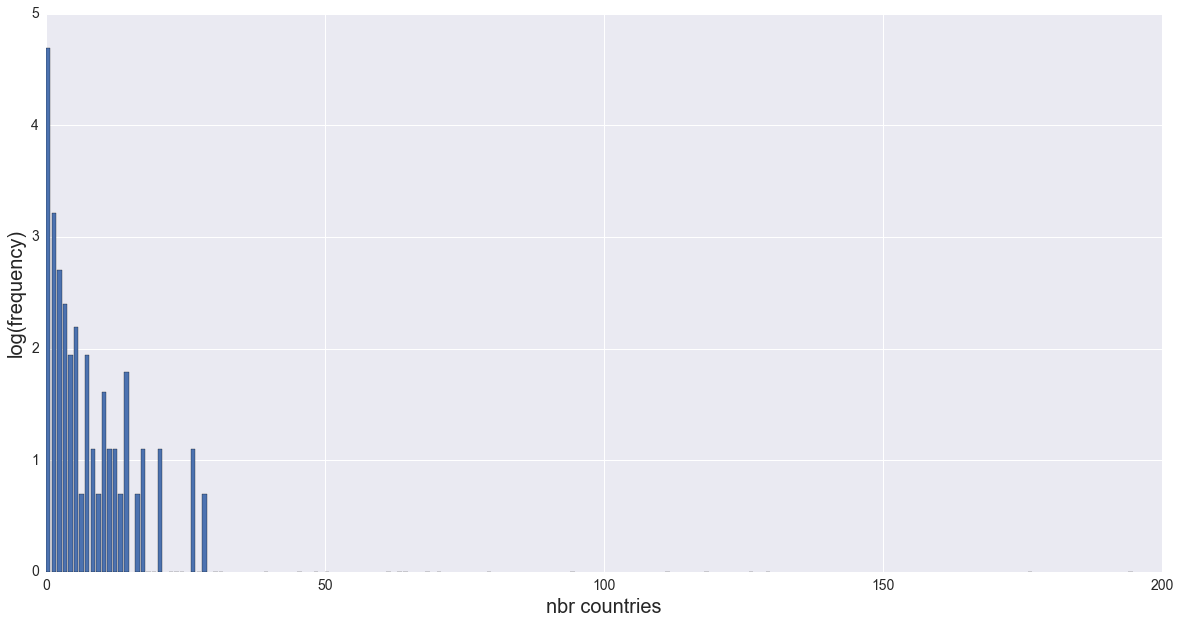

In [62]:
plt.figure(figsize=(20,10))

plt.xlabel('nbr countries', fontsize=20)
plt.ylabel('log(frequency)', fontsize=20)
plt.bar(sorted_freq_df.freq.value_counts().index, np.log(sorted_freq_df.freq.value_counts()))

plt.yticks(fontsize=14)
plt.xticks(fontsize = 14)

plt.show()

So, most of the countries are cited just a few times in the e-mails. Thus, we just pick the 20 most mentioned ones.

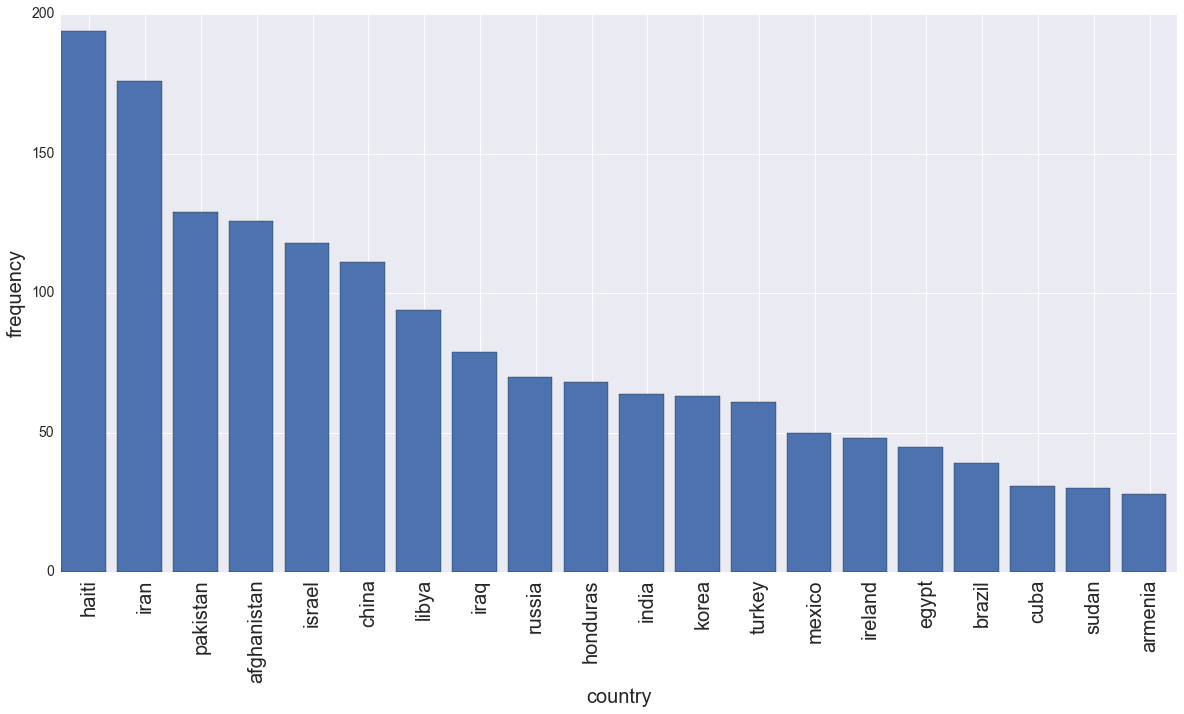

In [63]:
plt.figure(figsize=(20,10))

x = sorted_freq_df.index
y = sorted_freq_df.values

nPlot = 20
xplot = np.arange(nPlot)
plt.bar(xplot, y[0:nPlot])

plt.ylabel('frequency', fontsize=20)
plt.xlabel('country', fontsize=20)

plt.yticks(fontsize = 14)
plt.xticks(xplot+0.5, list(x[0:nPlot]), rotation='vertical',  fontsize = 20)

plt.show()

<hr>

_Perform sentiment analysis on every email message using the demo methods in the nltk.sentiment.util module. Aggregate the polarity information of all the emails by country, and plot a histogram (ordered and colored by polarity level) that summarizes the perception of the different countries._

The next function applies steps from the text analysis pipeline that were not applied when we looked for the names of the countries.

In [66]:
def further_preprocessing(email):
    
    # Remove stopwords
    context_stopwords = ['re', 'fw', 'pm', 'fwd', 'fvv', 'subject', 's', '@', 'com',
                     'today', 'tomorrow', 'new', "n't", 'call', 'talk', 'also',
                     'thank', 'thanks', 'sent', 'h', 'date', 'doc', 'no.', 'b6', 'from', 'to']
    stops = set(stopwords.words('english') + list(punctuation) + context_stopwords)
    
    tokens = wordpunct_tokenize(email)
    tokens_sw = [token for token in tokens if token not in stops]
    
    # Lemmatize
    wnl = WordNetLemmatizer()
    tokens_lemm = [wnl.lemmatize(token) for token in tokens_sw]
    text_lemm = ' '.join(tokens_lemm)
    
    return text_lemm

### Sentiment analysis with Vader

In [67]:
from nltk.sentiment import SentimentIntensityAnalyzer
vader_analyzer = SentimentIntensityAnalyzer()

The dictionary below takes some time to be generated, we create a pickle file for later usage.

In [ ]:
email_polarity_dict = dict()
for idx,row in email_text_df.iterrows():
    email_polarity_dict[idx] = vader_analyzer.polarity_scores(further_preprocessing(row.text))

In [ ]:
# Save dictionary into a pickle file.
import pickle
pickle.dump(email_polarity_dict, open("email_polarity_dict.p", "wb"))

In [69]:
# Load the dictionary back from the pickle file.
import pickle
email_polarity_dict = pickle.load(open("email_polarity_dict.p", "rb"))

In the following:
- we just consider the compound sentiment of each email, and 
- we we only keep countries mentioned at least once.

In [70]:
country_polarity_dict = dict()
for country in country_email_dict:
    email_indices = country_email_dict[country]
    polarity_scores = []
    for email_idx in email_indices:
        polarity_scores.append(email_polarity_dict[email_idx]['compound'])
    
    if polarity_scores:
        country_polarity_dict[country] = np.mean(polarity_scores)

In [71]:
country_polarity_dict['italy']

0.23520625000000001

We create a DataFrame for the polarity of each country

In [72]:
polarity_df = pd.DataFrame.from_dict(country_polarity_dict, orient='index')
polarity_df.index.name = 'country'
polarity_df.columns = ['polarity']
polarity_df.head()

,polarity
country,
slovenia,0.483500
palau,0.531632
netherlands,-0.100171
italy,0.235206
ukraine,0.715160


And we now join it with the sorted DataFrame of frequencies to obtain a DataFrame containing both values and ordered (discending) by frequency.

In [73]:
polarity_df = polarity_df.join(sorted_freq_df, how = 'inner')

In [74]:
polarity_df.head()

,polarity,freq
country,,
haiti,0.288541,194
iran,0.254602,176
pakistan,0.222433,129
afghanistan,0.330522,126
israel,0.270327,118


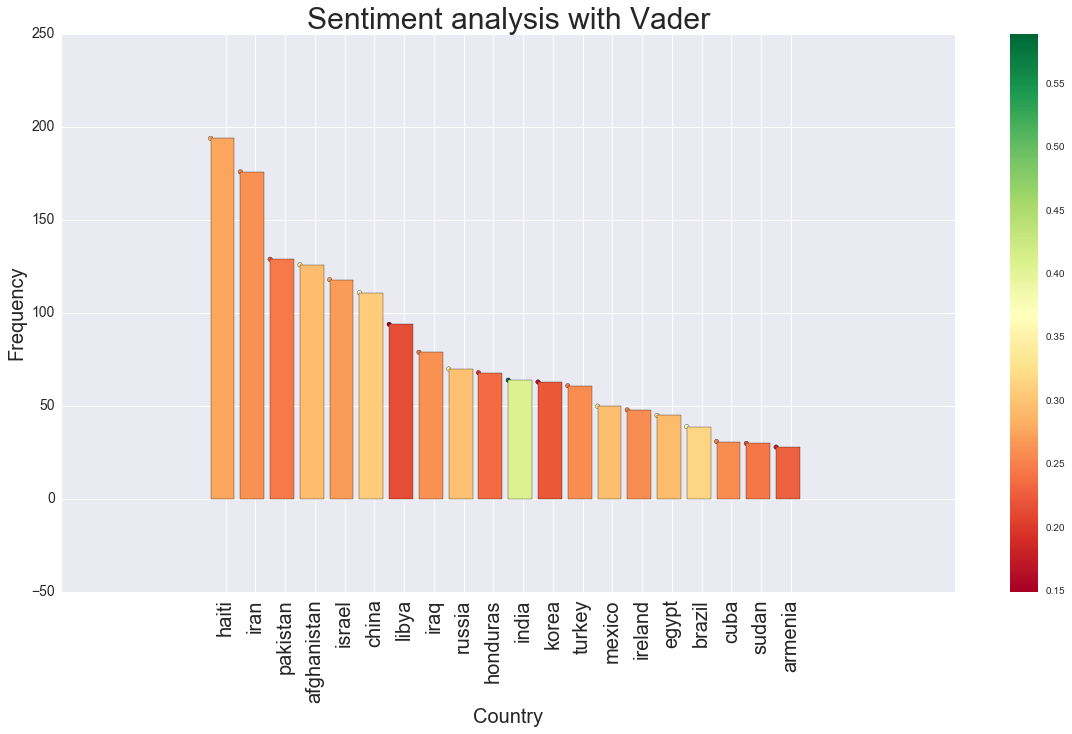

In [75]:
from matplotlib import cm

plt.figure(figsize=(20,10))

x = polarity_df.index
y = polarity_df['freq']

polarities = polarity_df['polarity']
colors = cm.RdYlGn(polarities / (max(polarities)))

# color reference bar 
nPlot = 20
xplot = np.arange(nPlot)
plot = plt.scatter(xplot, y[0:nPlot],c=polarities[0:nPlot], cmap='RdYlGn')
plt.colorbar(plot)
plt.xticks(fontsize=14)

# bar plot
plt.bar(xplot, y[0:nPlot], color = colors)
plt.xticks(xplot+0.5, list(x[0:nPlot]), rotation='vertical', fontsize=20)
plt.yticks(fontsize=14)

plt.title('Sentiment analysis with Vader', fontsize = 30)
plt.ylabel('Frequency', fontsize=20)
plt.xlabel('Country', fontsize=20)

plt.show()

<hr>

_Repeat the aggregation + plotting steps using different demo methods from the sentiment analysis module -- can you find substantial differences?_

### Sentiment analysis with  Liu and Hu opinion lexicon

In [76]:
from nltk.corpus import opinion_lexicon

The dictionary below took us too much time to be generated (still not finished after 3 hours). This is because Li and Hu opinion runs the sentiment analysis on each word and there are around 500,000 words and so it takes a long time.

In [77]:
def get_email_opinion(email):
    
    tokens = wordpunct_tokenize(email)
    opinions = []
    for word in tokens:
        if word in opinion_lexicon.positive():
            opinions.append(1)
        elif word in opinion_lexicon.negative():
            opinions.append(-1)
        else:
            opinions.append(0)
    
    return np.mean(opinions)

In [ ]:
email_opinion_dict = dict()
for idx,row in email_text_df.iterrows():
    email_opinion_dict[idx] = get_email_opinion(further_preprocessing(row.text))

So, we try to run it with 100 e-mails

In [79]:
email_opinion_dict = dict()
max_iter = 100
for i in range(max_iter):
    randomIndex = int(10000*np.random.rand() % len(email_text_df))
    email_opinion_dict[randomIndex] = get_email_opinion(further_preprocessing(email_text_df.iloc[randomIndex].text))

/home/ema/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [80]:
# Save dictionary into a pickle file.
import pickle
pickle.dump(email_opinion_dict, open("email_opinion_dict.p", "wb"))

In [81]:
# Load the dictionary back from the pickle file.
import pickle
email_opinion_dict = pickle.load(open("email_opinion_dict.p", "rb"))

In [82]:
country_opinion_dict = dict()
for country in country_email_dict:
    email_indices = country_email_dict[country]
    polarity_scores = []
    for email_idx in email_indices:
        try:
            polarity_scores.append(email_opinion_dict[email_idx])

            if polarity_scores:
                country_opinion_dict[country] = np.mean(polarity_scores)
        except:
            pass

In [83]:
opinion_df = pd.DataFrame.from_dict(country_opinion_dict, orient='index')
opinion_df.index.name = 'country'
opinion_df.columns = ['opinion']
opinion_df.head()

,opinion
country,
mexico,0.000000
palau,0.000000
sudan,0.032258
kazakhstan,0.000000
qatar,0.047619


In [84]:
opinion_df = opinion_df.join(sorted_freq_df, how = 'inner')

In [86]:
opinion_df.head(20)

,opinion,freq
country,,
haiti,0.107692,194
iran,NaN,176
pakistan,0.000000,129
afghanistan,0.000000,126
israel,-0.021457,118
china,0.000000,111
libya,0.000000,94
iraq,0.300000,79
russia,0.000000,70


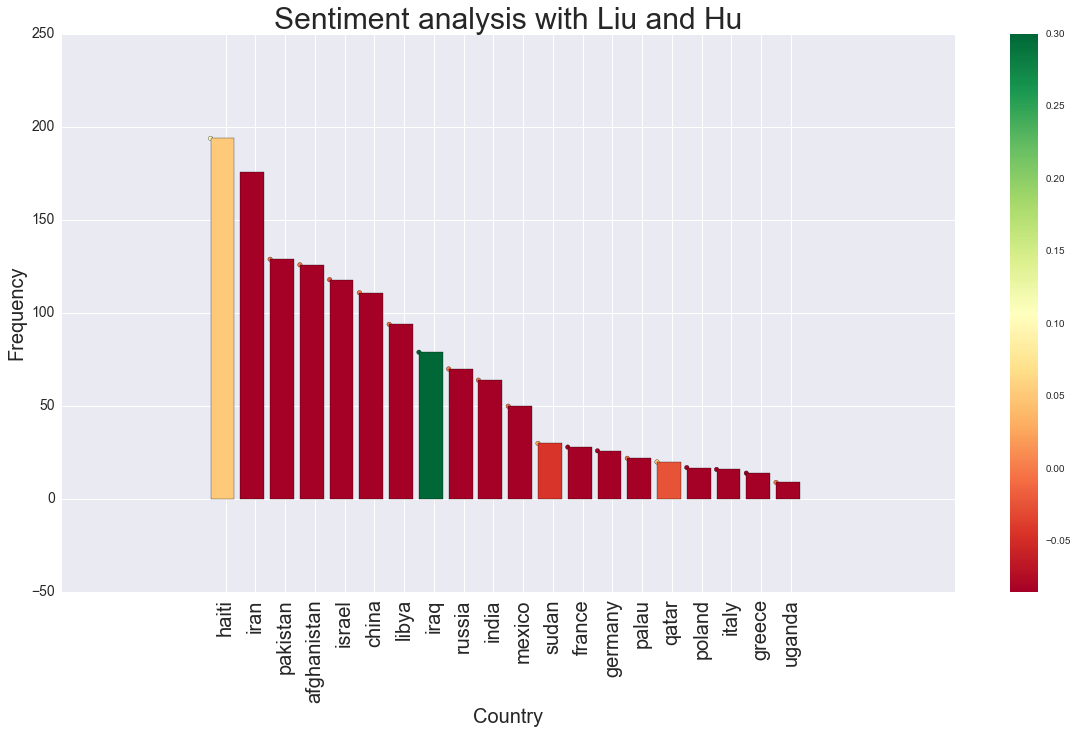

In [89]:
from matplotlib import cm

plt.figure(figsize=(20,10))

x = opinion_df.index
y = opinion_df['freq']

polarities = opinion_df['opinion']
colors = cm.RdYlGn(polarities / (max(polarities)))

# color reference bar 
nPlot = 20
xplot = np.arange(nPlot)
plot = plt.scatter(xplot, y[0:nPlot],c=polarities[0:nPlot], cmap='RdYlGn')
plt.colorbar(plot)
plt.xticks(fontsize=14)

# bar plot
plt.bar(xplot, y[0:nPlot], color = colors)
plt.xticks(xplot+0.5, list(x[0:nPlot]), rotation='vertical', fontsize=20)
plt.yticks(fontsize=14)

plt.title('Sentiment analysis with Liu and Hu', fontsize = 30)
plt.ylabel('Frequency', fontsize=20)
plt.xlabel('Country', fontsize=20)

plt.show()

From this, we obtain opinions about countries which are not accurate. For example, the sentiment for India was slightly poistive with Vader, but it is strongly negative with Liu and Hu. This is because 
- the corpus used for analysis is small
- this approach does opinions based on words and this might not represent the meaning of a sentence.



<hr><hr>

# Exercise 3

_Using the models.ldamodel module from the gensim library, run topic modeling over the corpus. Explore different numbers of topics (varying from 5 to 50), and settle for the parameter which returns topics that you consider to be meaningful at first sight._

In [171]:
emails.head()

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,MetadataDocumentClass,ExtractedSubject,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,HRC_Email_296,FW: Wow,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,HRC_Email_296,NaN,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,HRC_Email_296,Re: Chris Stevens,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,HRC_Email_296,FVV: Cairo Condemnation - Final,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,HRC_Email_296,NaN,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


We will create a document for each email thread, based on subject. We do this over the next few cells.

In [172]:
emails[['MetadataSubject', 'ExtractedBodyText']].head()

,MetadataSubject,ExtractedBodyText
0,WOW,NaN
1,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest..."
2,CHRIS STEVENS,Thx
3,CAIRO CONDEMNATION - FINAL,NaN
4,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"H <hrod17@clintonemail.com>\nFriday, March 11,..."


In [173]:
sub_body_df = emails[['MetadataSubject', 'ExtractedBodyText']]
sub_body_df.set_index(['MetadataSubject'], inplace=True)

In [174]:
sub_body_df.head()

,ExtractedBodyText
MetadataSubject,
WOW,NaN
H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MORE... SID,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest..."
CHRIS STEVENS,Thx
CAIRO CONDEMNATION - FINAL,NaN
H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MORE... SID,"H <hrod17@clintonemail.com>\nFriday, March 11,..."


In [175]:
sub_body_df.index.is_unique

False

In [176]:
unique_indices = sub_body_df.index.unique()

In [177]:
unique_indices

array(['WOW', 'H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MORE... SID',
       'CHRIS STEVENS', ..., 'RICHARD (TNR)', 'SENATE',
       'NOTE FOR SECRETARY CLINTON'], dtype=object)

In [178]:
len(unique_indices)

4174

Thus we have around 2 emails per conversation (seems reasonable: Question + Answer)

In [179]:
sub_body_df.loc['WOW']

,ExtractedBodyText
MetadataSubject,
WOW,NaN
WOW,RELEASE IN PART\nB6\nfyi
WOW,Editorial: Mrs. Clinton in Pakistan\nNEW YORK ...


In [180]:
visited_indices = set()
documents = []
for idx,row in sub_body_df.iterrows():
    if idx not in visited_indices and idx is not np.nan:
        visited_indices.add(idx)
        extracted_body = sub_body_df.loc[idx]['ExtractedBodyText']
        document = idx + '.'
        if extracted_body is not np.nan:
            if type(extracted_body) is str:
                document += ' ' + extracted_body
            else:
                for body in sub_body_df.loc[idx]['ExtractedBodyText'].values:
                    if body is not np.nan:
                        document += ' ' + body
        documents.append(document)

In [181]:
def preprocess(text):
    
    # replace \n with a space
    text_basic = text.replace('\n', ' ')
    
    # lower the text
    text_lower = text_basic.lower()
    
    prepro_text = further_preprocessing(text_lower)
    
    return prepro_text

In [182]:
prepro_docs = [preprocess(document) for document in documents]

In [183]:
prepro_docs[0][:200]

'wow release part fyi editorial mr clinton pakistan york time october 30 2009 hillary rodham clinton first trip pakistan secretary state never going easy day arrived extremist detonated car bomb crowde'

Now that we have the documents, we can proceed to extract topic modeling using lda.

In [78]:
import gensim

In [185]:
texts = [[word for word in document.split() if word not in stops] for document in documents]
dictionary = gensim.corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [186]:
import re

def get_topics(lda_result):
    text = lda_result[1]
    matches = re.findall(r'\b[A-z]+\b', text)
    
    return ",".join(matches)

In [187]:
ldas_topics = []
n_topics = [5*i for i in range(1,11)]
for n in n_topics:
    ldas_topics.append(gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                                       id2word=dictionary, num_topics=n).print_topics())

In [188]:
len(ldas_topics[9])

20

In [189]:
for i in range(len(ldas_topics)):
    print('=========================================== ' + 
          str(5*(i+1)) + ' topics ===========================================')
    for lda_result in ldas_topics[i]:
        print(get_topics(lda_result))
    print()

=========================================== 5 topics ===========================================
I,The,PM,would,H,H,AM
I,The,TO,IN,AP,In,would,REUTERS,ON,A
The,I,would,U,S,nuclear,Obama,New,United,But
I,OF,TO,THE,The,AND,IN,FOR,REUTERS,If
pm,Secretary,s,Office,MEETING,State,Department,route,ARRIVE,The,DEPART

=========================================== 10 topics ===========================================
pm,Secretary,s,Office,MEETING,route,ARRIVE,State,DEPART,Department,Room
I,The,OF,START,would,If,U,S,THE,We
The,U,S,would,United,I,nuclear,American,But,States,In
The,I,would,American,U,S,He,Obama,one,cables
The,Obama,would,In,He,But,Republican,PALIN,one,political
The,I,New,nuclear,would,Bloomberg,It,Obama,Mr
I,TO,The,PM,We,December,get,last
I,The,PM,H,AM,ratification,December
The,I,would,U,S,Start,American,We,Obama
IN,FOR,TO,Fyi,ON,REUTERS,THE,I,AP

=========================================== 15 topics ===========================================
I,The,would,one,US,START,And,last
The,H,

### Topic labelings

We looked at output of the lda with different number of topics. For 5 topics, we found that the lda returned incoherent results. We found that for 15 topics, we were able to make sense of the topics. Here are the labellings:

- I,The,U,S,would,Obama,But,If,one,He,American               $\rightarrow$ Obama
- IN,I,OF,PART,RELEASE,Wikileaks,AM                          $\rightarrow$ Wikileaks
- The,I,would,U,S,Obama,Palin,New,faith,American,It $\rightarrow$ ?
- TO,FOR,REUTERS,ON,IN,AND,I,Fyi,FROM,YOU $\rightarrow$ Press
- I,would,last,D,Northern,The $\rightarrow$ ?
- The,Israeli,would,I,Netanyahu,U,S,United,like,Jewish,Israel $\rightarrow$ USA-Israeli relations
- pm,Secretary,s,I,Office,Room,IN,MEETING,The,DAILY,ARRIVE $\rightarrow$ Meetings
- AP,PALIN,TALKS,I,Fyi,The,PALESTINIANS,HAITI,IN $\rightarrow$ Foreign policy
- The,TO,I,Romney,U,S,Obama $\rightarrow$ Elections
- I,Houston,State,U,S,Department,The,pm,SECURITY,KYRGYZSTAN $\rightarrow$ Internal security

Moreover, we notice that we do not get more than 20 topics. We think this is because of the limited context of the text.

# Exercise 4 (Bonus)

In [138]:
emails.head()

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,MetadataDocumentClass,ExtractedSubject,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,HRC_Email_296,FW: Wow,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,HRC_Email_296,NaN,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,HRC_Email_296,Re: Chris Stevens,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,HRC_Email_296,FVV: Cairo Condemnation - Final,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,HRC_Email_296,NaN,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


We create sender and receiver DataFrames.

In [139]:
sendRecv_df = pd.DataFrame()
sendRecv_df['receiver'] = emails['MetadataFrom']
sendRecv_df['sender'] = emails['MetadataTo']
sendRecv_df = sendRecv_df.dropna()
sendRecv_df = sendRecv_df.replace(';H','H')
sendRecv_df.head()

,receiver,sender
0,"Sullivan, Jacob J",H
2,"Mills, Cheryl D",H
3,"Mills, Cheryl D",H
4,H,"Abedin, Huma"
5,H,Russorv@state.gov


In [140]:
import community
import networkx as nx

In [141]:
allReceivers = sendRecv_df['receiver']
allSenders = sendRecv_df['sender']

We have 243 unique receivers and 228 unique senders, and 415 unique people in total.

In [142]:
len(allReceivers.unique())

243

In [143]:
len(allSenders.unique())

228

In [144]:
allPeople = set(allReceivers.unique()).union(allSenders.unique())
len(allPeople)

415

We generate the graph using nx.

In [145]:
G = nx.Graph()
edges = [list(x) for x in zip(allSenders, allReceivers)]
G.add_edges_from(edges)
# G.add_nodes_from(allReceivers)
# G.add_nodes_from(allSenders)

In [146]:
G.neighbors('H')[:10]

['lmuscatine',
 'Newmyer, Jackie',
 'abendinh@state.gov',
 'Rubiner, Laurie',
 'MillsCD@state.gov',
 'crowleypj@state.gov',
 'michele.flournoy',
 'sulllivanjj@state.gov',
 'Donilon, Thomas E',
 'rsloan']

In [147]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 415
Number of edges: 514
Average degree:   2.4771


We use the best_patition attribute of community. 

In [154]:
partition = community.best_partition(G)

We plot the graph to be able to visualize the communities.

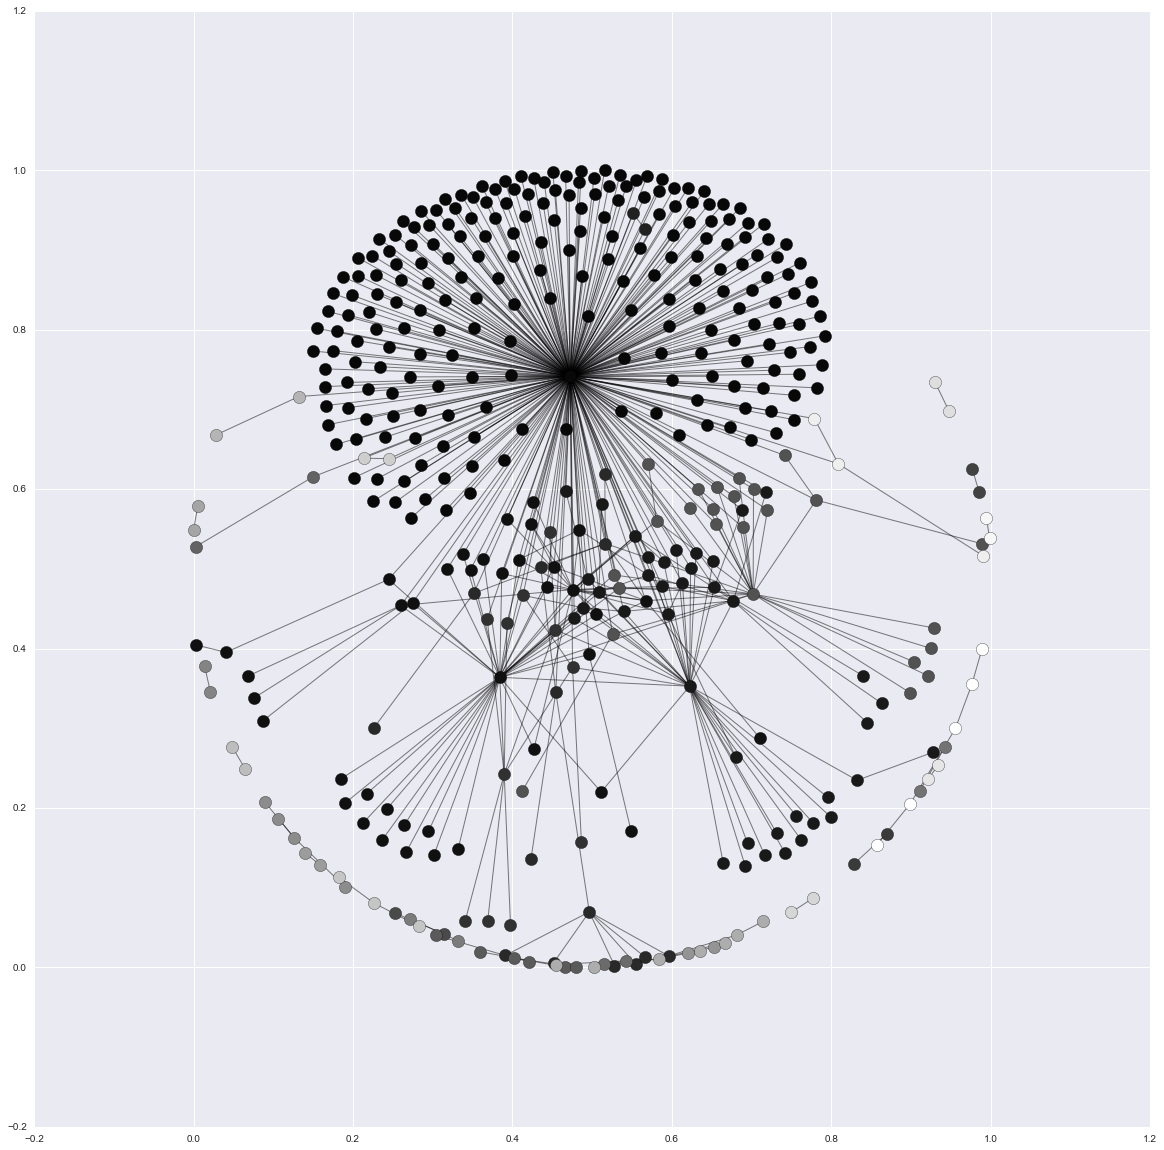

In [155]:
#drawing
plt.figure(figsize=(20,20))

size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 150,
                                node_color = str(count / size))


nx.draw_networkx_edges(G,pos, alpha=0.5)
plt.show()

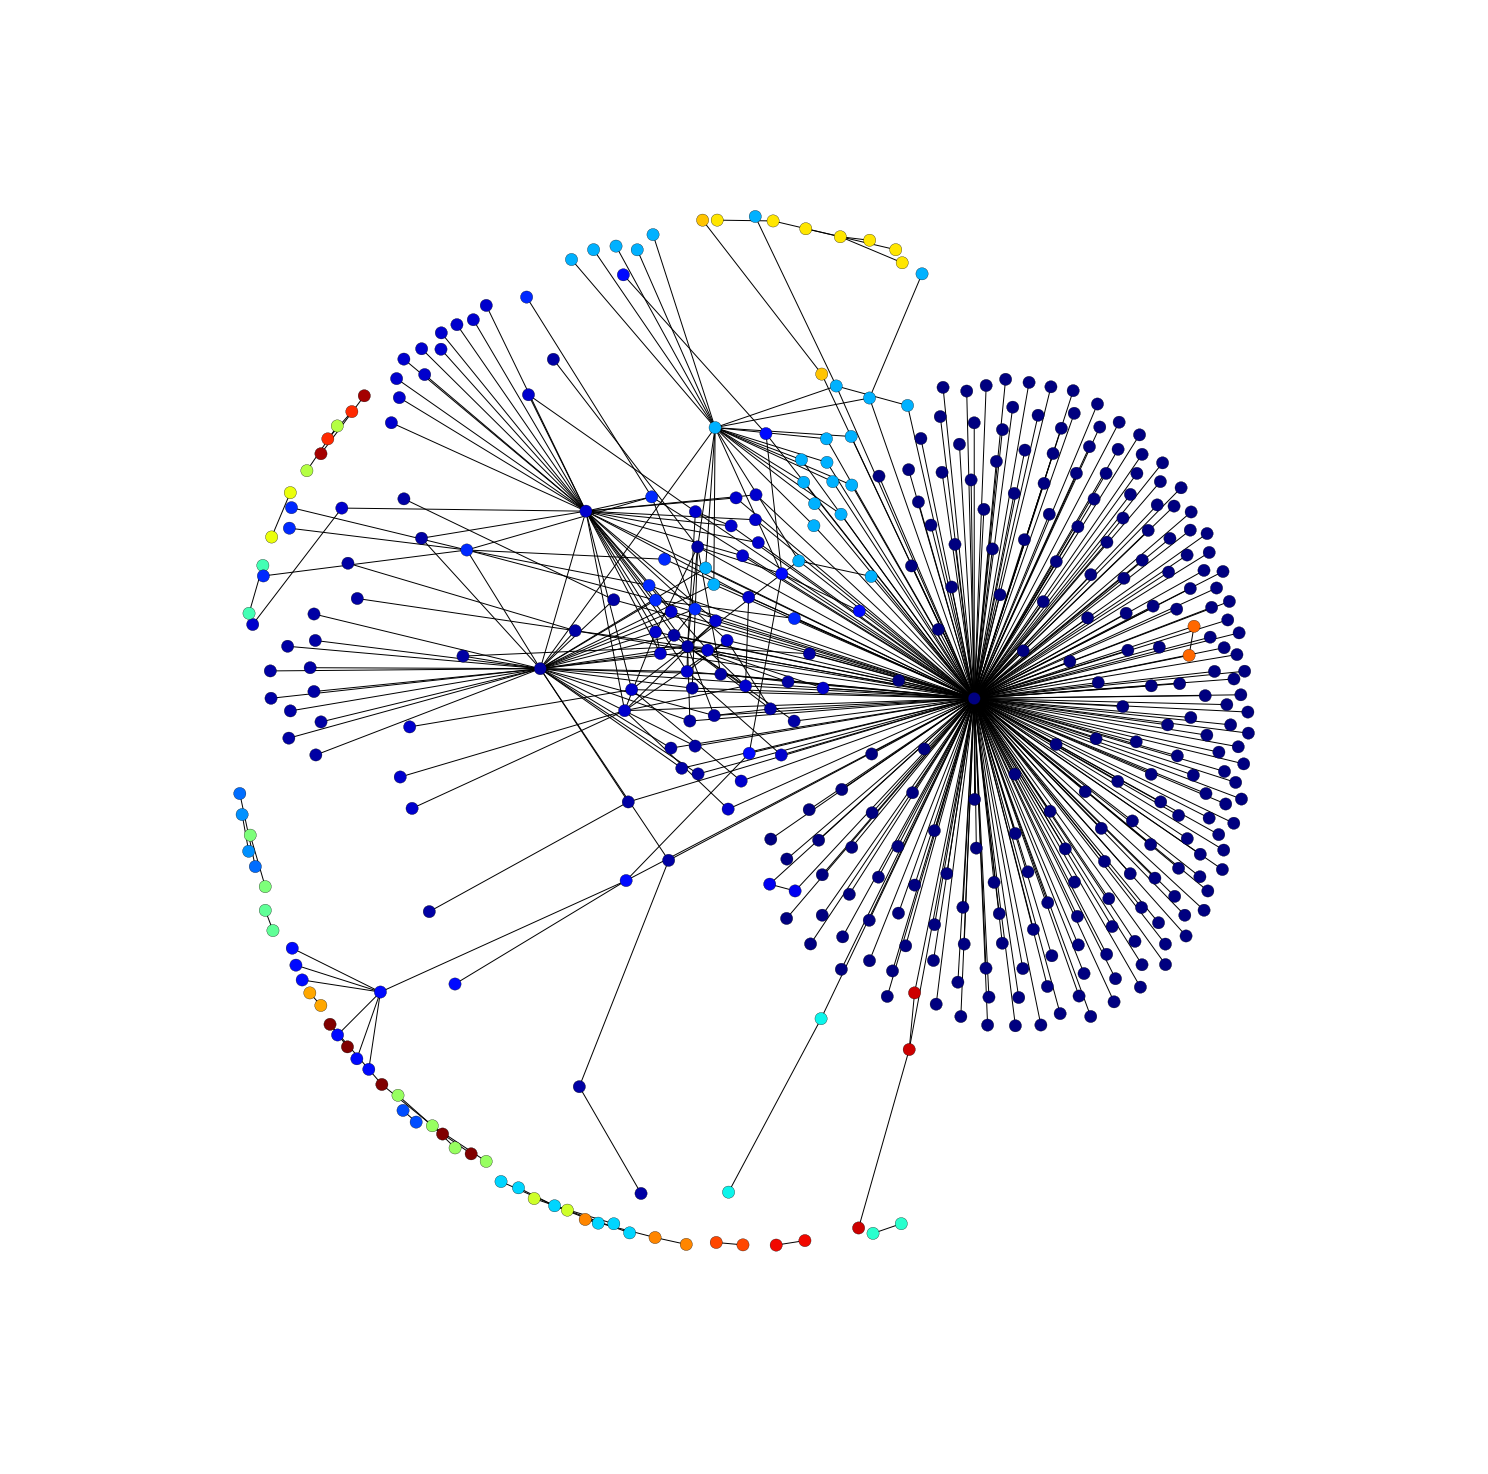

In [156]:
#drawing
plt.figure(figsize=(20,20))
part = community.best_partition(G)
values = [part.get(node) for node in G.nodes()]
nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size=150, with_labels=False)

Now, we extract the information from each community. We aggregated the senders and see the most common words they use.

In [157]:
from collections import defaultdict
community_dict = defaultdict(list)
for i in allPeople:
    community_dict[part[i]].append(i)

In [160]:
numCommunities = len(community_dict)

emails_by_community = {}
for i in range(numCommunities):
    emails_by_community[i] = emails[emails.MetadataFrom.isin(community_dict[i]) | emails.MetadataFrom.isin(community_dict[i])].RawText

In [161]:
from collections import Counter

text_by_community = {}
tokens_by_community = {}
topWords = {}
for i in range(numCommunities):
    text_by_community[i] = ' '.join(list(emails_by_community[i].dropna().values))
    text_by_community[i] = text_by_community[i].replace('\n',' ')
    text_by_community[i] = text_by_community[i].lower()
    tokens_by_community[i] = wordpunct_tokenize(text_by_community[i])
    tokens_by_community[i] = [token for token in tokens_by_community[i] if token not in stops]
    topWords[i] = Counter(tokens_by_community[i]).most_common(20)

In [162]:
topWords_dict = defaultdict(list)
for i in range(numCommunities):
    for j in range(len(topWords[i])):
        topWords_dict[i].append(topWords[i][j][0])

In [168]:
topWords_df = pd.DataFrame.from_dict(topWords_dict, orient='index')
topWords_df.index.name = 'Community'
topWords_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Community,,,,,,,,,,,,,,,,,,,,
0,state,u,2015,department,case,f,unclassified,2014,20439,gov,30,31,06,2009,08,message,original,clintonemail,2010,release
1,state,u,2015,department,case,unclassified,f,2014,20439,31,08,2010,gov,huma,abedin,release,2009,message,sullivan,pm
2,state,u,department,f,2015,case,unclassified,20439,2014,31,08,pm,cheryl,mills,2010,gov,2009,secretary,30,release
3,women,—,state,u,case,care,unclassified,f,2014,department,2015,20439,obama,could,neera,health,31,08,republicans,would
4,state,department,u,unclassified,2015,case,f,2014,20439,31,08,1,clinton,4,2010,sullivan,—,message,jake,original
5,state,u,department,case,2015,f,20439,unclassified,2014,31,08,2009,strobe,07,release,2010,talbott,message,huma,30
6,mongolia,..,state,president,1,08,unclassified,month,personally,would,u,c05769971,2014,next,case,department,f,31,2010,2015
7,state,2014,f,department,case,unclassified,c05763169,2015,u,06,20439,30,7,9,14,15,2009,4,introduction,foreign
8,£,northern,million,ireland,pressures,executive,meet,department,state,hm,treasury,unclassified,c05764498,policing,2014,2015,u,20439,justice,f


We see some similarities between the top words used by some communities and the LDA topics. For instance, communities 6, 15, 17 and 18 talk about foriegn relations which is one of the topics we observed using LDA. Another example is  communities 0, 1, 2, 27 and 30 talk about internal policy, which is also another topic we observed using LDA.

However, there are significant differences. Firstly, the analysis using communities give a more detailed insight into the topics. Details such as nuclear talks, talks with Mongolia, etc. were not found using LDA. Secondly, the analysis using communities brings about some new topics. For instance, community 8 talks about financial matters in Northern Ireland, community 22 talks about nuclear policy, which were not captured by the LDA. This is possibly due the fact that these are small communities with very few email exchanges. Case in point, community 8 has only 2 memebers (Prime Minister and Peter Robinson), which is clearly talking about the UK.